*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/exercise_notebooks/module04_ridge_regression_exercises.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%autosave 0

Autosave disabled


# Solving ridge regression using gradient descent

In this notebook you will implement ridge regression based on our implementation of linear regression.


### The gradient for linear regression

The mean-squared-error is our cost function for linear regression:

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N(y_i - \mathbf{w}^\top \mathbf{x}_i)^2 .
$$

For simplicity, we are ignoring the bias term $b$.  Before taking the gradient, we'll express it as:

The gradient:

\begin{equation}
\begin{split}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} & = 
\frac{1}{N}\sum_{i=1}^N \left( - 2y_i \mathbf{x}_i + 2(\mathbf{w}^\top \mathbf{x}_i)\mathbf{x}_i \right) \\
 & = -\frac{1}{N}\sum_{i=1}^N 2 \left( y_i - \mathbf{w}^\top \mathbf{x}_i\right) \mathbf{x}_i  .
\end{split}
\end{equation}


### Gradient descent

In the same way we were able to find the minimum of a univariate function using derivatives, we can find the minimum of a multi-dimensional surface by following the gradient.  This process is called **gradient descent**, and is described next.

Given a function $J(\mathbf{w})$, the gradient is the direction of steepest ascent.
Therefore to minimize $J(\mathbf{w})$, we iteratively take small steps in the direction of the negative of the gradient.


Gradient descent is an iterative algorithm as follows:

* Initialize $\mathbf{w}(0),\eta$
* for $t = 0,1,\ldots$
  * $\mathbf{w}(t+1) = \mathbf{w}(t) - \eta \frac{\partial J}{\partial \mathbf{w}}$
  * if converged, break
  
The halting condition for the algorithm can be specified in terms of the number of epochs like we did for the perceptron, or in terms of convergence of the loss function (the mean-squared-error).  In other words, if there is little change of the loss function across epochs.

### Linear regression using gradient descent

We are now ready to implement linear regression using gradient descent, and apply it to the advertising data.

In [2]:
data = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
X = data[['TV', 'radio']].values
y = data['sales'].values
X.shape, y.shape

((200, 2), (200,))

In [4]:
class linear_regression :
    def __init__(self, learning_rate=0.00001, 
                 bias_learning_rate=0.01, epochs=1000) :
        self.learning_rate = learning_rate
        self.bias_learning_rate = bias_learning_rate
        self.epochs = epochs

    def compute_loss(self, X, y):
        squared_errors = np.power((self.predict(X) - y), 2)
        return np.sum(squared_errors) / len(X)
  
    def predict(self, X) :
        return X @ self.w + self.b
                              
    def fit(self, X, y):
        self.w = np.zeros( (X.shape[1]), np.float)
        self.b = 0.0
        # self.loss stores a history of the loss function values
        self.loss = []
        for i in range(self.epochs):
            y_pred = self.predict(X)
            # compute individual gradients and then average them:
            gradients_w = np.array([-2*(y[i]-y_pred[i])*X[i] 
                                    for i in range(len(X))])
            gradient_w = np.mean(gradients_w, axis=0)
            # updating w with the gradient
            #print(gradient_w.shape)
            self.w = self.w - self.learning_rate * gradient_w
            gradient_b = - 2 * np.mean( (y - y_pred) )
            #gradients_b = [-2*(y[i]-y_pred[i]) for i in range(len(X))]
            #gradient_b = np.sum(gradients_b) / len(X)
            # updating b with the gradient:
            self.b = self.b - self.bias_learning_rate * gradient_b

            self.loss.append(self.compute_loss(X, y))


In [5]:
linreg = linear_regression()
linreg.fit(X, y)

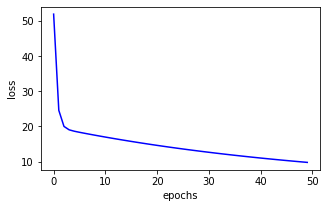

In [6]:
plt.figure(figsize=(5,3))
plt.plot(linreg.loss[:50], 'b')
plt.xlabel('epochs')
plt.ylabel('loss');

Let's compare the learned parameters with the solution using the scikit-learn implementation:

In [7]:
from sklearn.linear_model import LinearRegression

# instantiate and fit
linreg_sklearn = LinearRegression()
linreg_sklearn.fit(X, y)

# print the coefficients
print (linreg_sklearn.coef_, linreg_sklearn.intercept_)
print (linreg.w, linreg.b)

[0.04575482 0.18799423] 2.9210999124051362
[0.04552492 0.18527279] 3.030795322196597


### Ridge regression ($L_2$ regularization)

Our orginal loss function

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N(y_i - \mathbf{w}^\top \mathbf{x}_i)^2 
$$

is replaced by a regularized version that adds another term to the loss function:

$$
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 + \alpha \,||\mathbf{w}||^2.
$$

Here, $\alpha>0$ is a parameter that controls the trade-off between fitting and regularization.
The regularizer $\mathbf{w}^\top \mathbf{w}$ is known as the $L_2$ regularizer.  Linear regression with the $L_2$ regularizer is known as *ridge regression*.


### Exercise

* Derive the gradient for ridge regression.
* Implement ridge regression by modifying the implementation of linear regression.